# Algorithm explanation

In [17]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from src import P3C

### Sample dataset

First, we will generate a simple dataset with clear clusters to aid with visualisation

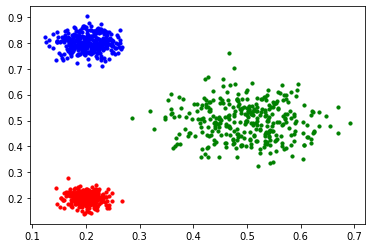

In [3]:
centers = [(0.2, 0.2, 0.2), (0.2, 0.8, 0.8), (0.5, 0.5, 0.5)]
cluster_std = [0.02, 0.03, 0.07]

data, y = make_blobs(n_samples=1000, cluster_std=cluster_std, centers=centers, n_features=3, random_state=1)

plt.scatter(data[y == 0, 0], data[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(data[y == 1, 0], data[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(data[y == 2, 0], data[y == 2, 1], color="green", s=10, label="Cluster3")

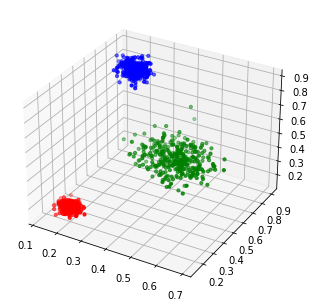

In [4]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(data[y == 0, 0], data[y == 0, 1], data[y == 0, 2], color="red", s=10, label="Cluster1")
ax.scatter(data[y == 1, 0], data[y == 1, 1], data[y == 1, 2], color="blue", s=10, label="Cluster2")
ax.scatter(data[y == 2, 0], data[y == 2, 1], data[y == 2, 2], color="green", s=10, label="Cluster3")
pyplot.show()

### Splitting data into bins

Along each axis...

Dimension 0


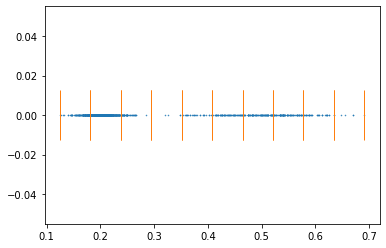

Dimension 1


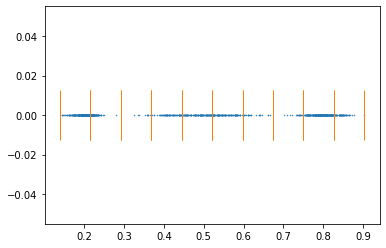

Dimension 2


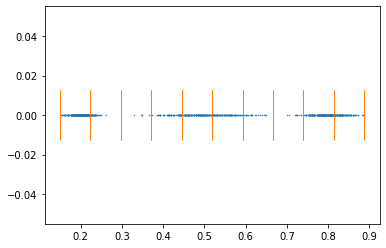

In [5]:
bins, nr_of_bins = P3C.split_into_bins(data)

for column_bins in bins:
    P3C.mark_bins(column_bins, nr_of_bins)
    
for column_bins in bins:
    P3C.mark_merge_bins(column_bins)

for dim in range(len(data[0])):
    print(f"Dimension {dim}")
    val = 0. # this is the value where you want the data to appear on the y-axis.
    
    points = [x[dim] for x in data]
    pyplot.plot(points, np.zeros_like(points) + val, 'o', fillstyle='none', ms=0.5)
    
    bin_limits = np.array([(b.interval.start, b.interval.end) for b in bins[dim]]).flatten()
    pyplot.plot(bin_limits, np.zeros_like(bin_limits) + val, '|', ms=50)
    
    pyplot.show()

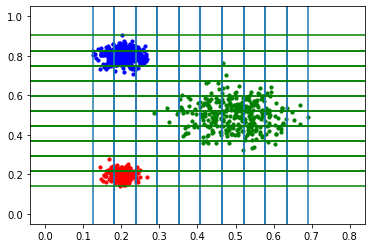

In [6]:
plt.scatter(data[y == 0, 0], data[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(data[y == 1, 0], data[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(data[y == 2, 0], data[y == 2, 1], color="green", s=10, label="Cluster3")

for b in bins[0]:
    plt.axline((b.interval.start, 0), (b.interval.start, 1))
    plt.axline((b.interval.end, 0), (b.interval.end, 1))
    
for b in bins[1]:
    plt.axline((0, b.interval.start), (0.8, b.interval.start), c="green")
    plt.axline((0, b.interval.end), (0.8, b.interval.end), c="green")

plt.show()

Dimension 0


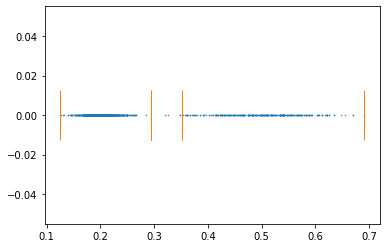

Dimension 1


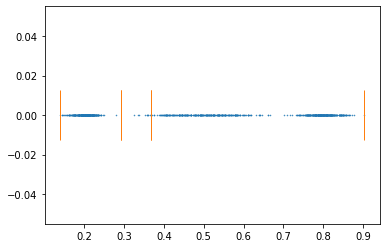

Dimension 2


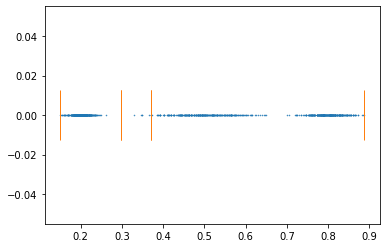

In [7]:
new_bins = P3C.merge_all_bins(bins)

for dim in range(len(data[0])):
    print(f"Dimension {dim}")
    val = 0. # this is the value where you want the data to appear on the y-axis.
    
    points = [x[dim] for x in data]
    pyplot.plot(points, np.zeros_like(points) + val, 'o', fillstyle='none', ms=0.5)
    
    bin_limits = np.array([(b.interval.start, b.interval.end) for b in new_bins[dim]]).flatten()
    pyplot.plot(bin_limits, np.zeros_like(bin_limits) + val, '|', ms=50)
    
    pyplot.show()

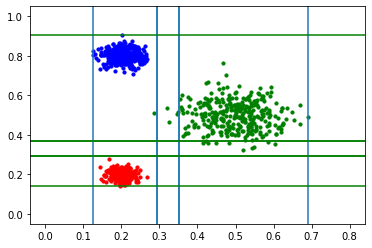

In [8]:
plt.scatter(data[y == 0, 0], data[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(data[y == 1, 0], data[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(data[y == 2, 0], data[y == 2, 1], color="green", s=10, label="Cluster3")

for b in new_bins[0]:
    plt.axline((b.interval.start, 0), (b.interval.start, 1))
    plt.axline((b.interval.end, 0), (b.interval.end, 1))
    
for b in new_bins[1]:
    plt.axline((0, b.interval.start), (0.8, b.interval.start), c="green")
    plt.axline((0, b.interval.end), (0.8, b.interval.end), c="green")

plt.show()

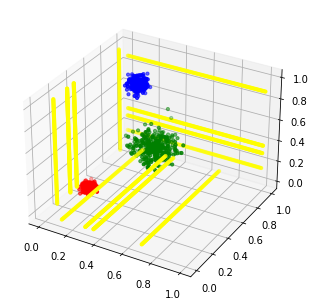

In [9]:
fig = pyplot.figure()
ax = Axes3D(fig)

bins_0 = np.array([(x.interval.start, x.interval.end) for x in new_bins[0]] * 100).flatten()
ax.scatter(bins_0, np.linspace(0, 1, len(bins_0)), [0 for _ in range(len(bins_0))], color="yellow", s=10)

bins_1 = np.array([(x.interval.start, x.interval.end) for x in new_bins[1]] * 100).flatten()
ax.scatter([0 for _ in range(len(bins_1))], bins_1, np.linspace(0, 1, len(bins_1)), color="yellow", s=10)

bins_2 = np.array([(x.interval.start, x.interval.end) for x in new_bins[2]] * 100).flatten()
ax.scatter(np.linspace(0, 1, len(bins_2)), [1 for _ in range(len(bins_2))], bins_2, color="yellow", s=10)

ax.scatter(data[y == 0, 0], data[y == 0, 1], data[y == 0, 2], color="red", s=10, label="Cluster1")
ax.scatter(data[y == 1, 0], data[y == 1, 1], data[y == 1, 2], color="blue", s=10, label="Cluster2")
ax.scatter(data[y == 2, 0], data[y == 2, 1], data[y == 2, 2], color="green", s=10, label="Cluster3")
pyplot.show()

### Find candidates

In [10]:
tree = P3C.construct_candidate_tree_start(data, new_bins)
ns = P3C.construct_new_level(0, tree, 1e-4)
candidate_list = P3C.get_candidates(ns)

candidate_list

Constructing candidate tree: 
    Level:  0
    Level:  1
    Level:  2


[NumBins: 3, NumPoints: 332, Parent: False,
 NumBins: 3, NumPoints: 334, Parent: False,
 NumBins: 3, NumPoints: 312, Parent: False]

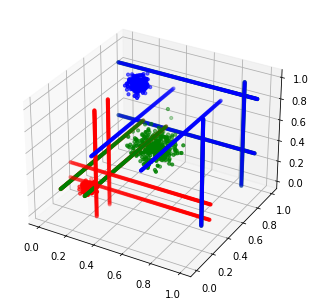

In [11]:
fig = pyplot.figure()
ax = Axes3D(fig)

for psig, color in zip(candidate_list, ['red', 'green', 'blue']):
    intervals = [(b.interval.start, b.interval.end) for b in sorted(psig.bins, key=lambda x: x.dimension)]
    
    bins_0 = np.array(intervals[0] * 100).flatten()
    ax.scatter(bins_0, np.linspace(0, 1, len(bins_0)), [intervals[0][1] for _ in range(len(bins_0))], color=color, s=10)
    bins_1 = np.array(intervals[1] * 100).flatten()
    ax.scatter([intervals[1][1] for _ in range(len(bins_1))], bins_1, np.linspace(0, 1, len(bins_1)), color=color, s=10)
    bins_2 = np.array(intervals[2] * 100).flatten()
    ax.scatter(np.linspace(0, 1, len(bins_2)), [intervals[2][1] for _ in range(len(bins_2))], bins_2, color=color, s=10)

ax.scatter(data[y == 0, 0], data[y == 0, 1], data[y == 0, 2], color="red", s=10, label="Cluster1")
ax.scatter(data[y == 1, 0], data[y == 1, 1], data[y == 1, 2], color="blue", s=10, label="Cluster2")
ax.scatter(data[y == 2, 0], data[y == 2, 1], data[y == 2, 2], color="green", s=10, label="Cluster3")
pyplot.show()

### Get means

In [12]:
inv_cov_cluster_dict = P3C.get_inv_cov_cluster_dict(candidate_list)
result, gmm, means = P3C.get_result(data, candidate_list, inv_cov_cluster_dict)
means_after_bgm, cluster_dict, cluster_points = P3C.get_clusters_and_means(candidate_list, data, result, means)

Constructing fuzzy matrix for 1000 datapoints: 
    0/1000
    100/1000
    200/1000
    300/1000
    400/1000
    500/1000
    600/1000
    700/1000
    800/1000
    900/1000
Final cluster means:  [array([0.202891  , 0.79952637, 0.80032143]), array([0.2000279 , 0.20218726, 0.20208437]), array([0.49887961, 0.49880413, 0.49809375])]


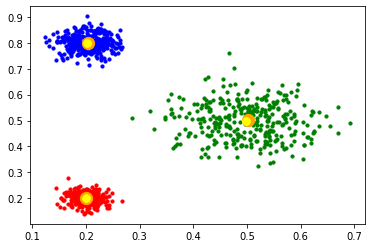

In [13]:
plt.scatter(data[y == 0, 0], data[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(data[y == 1, 0], data[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(data[y == 2, 0], data[y == 2, 1], color="green", s=10, label="Cluster3")

plt.scatter([m[0] for m in means], [m[1] for m in means], color="orange", s=150, label="Means")
plt.scatter([m[0] for m in means_after_bgm], [m[1] for m in means_after_bgm], color="yellow", s=60, label="Means2")

plt.show()

### Outliers

In [14]:
clustered = P3C.find_outliers(data, candidate_list, cluster_dict, cluster_points, means_after_bgm, degree_of_freedom=7, alpha=0.2)

Chi critical value for outline detection:  3.8223219077661383
    Found an outlier with the distance 4.596002610145371 at point (3, array([0.47509174, 0.70260703, 0.71945331]))
    Found an outlier with the distance 14.40627984107786 at point (3, array([0.28551011, 0.50807592, 0.5222199 ]))
    Found an outlier with the distance 4.061909753953241 at point (3, array([0.46610057, 0.76181742, 0.59381903]))


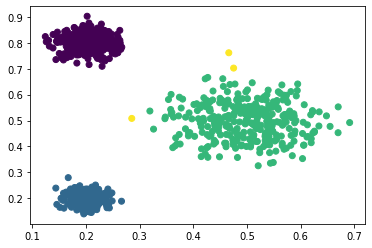

In [15]:
plt.scatter([x[1][0] for x in clustered], [y[1][1] for y in clustered], c = [z[0] for z in clustered])
plt.show()

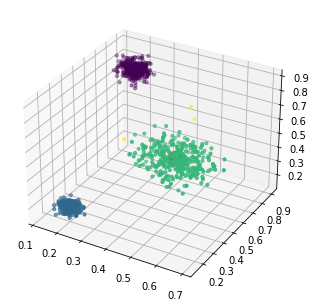

In [16]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter([x[1][0] for x in clustered], [x[1][1] for x in clustered], [x[1][2] for x in clustered], c=[x[0] for x in clustered], s=10, zorder=0)
ax.scatter([x[0] for x in means_after_bgm], [x[1] for x in means_after_bgm], [x[2] for x in means_after_bgm], color="red", s=200, zorder=100)
pyplot.show()